In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [2]:
import joblib

In [3]:
from mtranslate import translate

In [1]:
df = pd.read_csv('Symptom_Data/dataset.csv')

NameError: name 'pd' is not defined

In [16]:
from translate import Translator

# Çeviri işlemi için Translator objesini oluştur
translator = Translator(to_lang="tr")

# Tüm sütunları döngüye alarak çevirin
for column in df.columns:
    # Her satırı çevirin ve yeni sütuna ekleyin
    df[column] = df[column].apply(lambda x: translator.translate(x))

# Sonucu başka bir CSV dosyasına kaydedin
df.to_csv('cevrilmis_dosya.csv', index=False)

KeyboardInterrupt: 

In [40]:
df = shuffle(df,random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
for col in df.columns:
    df[col] = df[col].str.replace('_' , ' ')

df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name = 'count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


In [45]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [5]:
df_severity = pd.read_csv('Symptom_Data/Symptom-severity.csv')
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_',' ')
df_severity.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [48]:
df_severity['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [49]:
vals = df.values
symptoms = df_severity['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_severity[df_severity['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


In [50]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


In [51]:
null_checker = df.apply(lambda x : sum(x.isnull())).to_frame(name = 'count')

print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


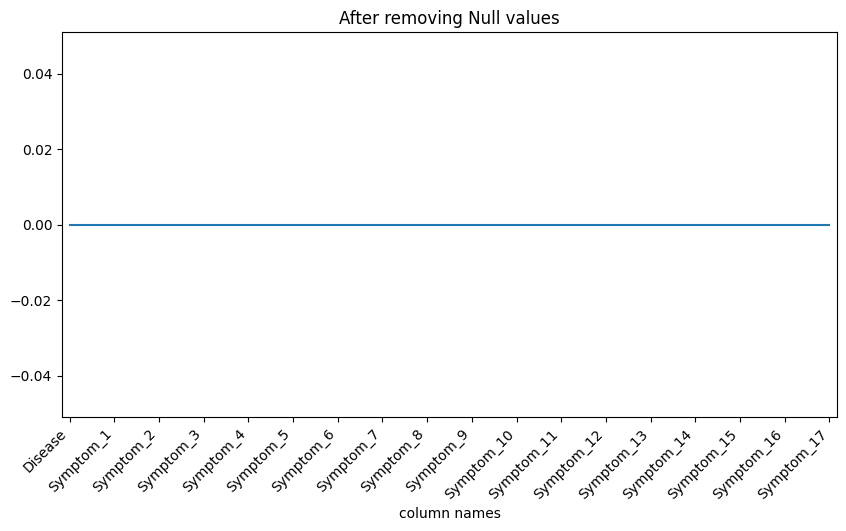

In [52]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index , null_checker['count'])
plt.xticks(null_checker.index , null_checker.index , rotation=45, horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [54]:
print("Number of symptoms used to identify the disease ",len(df_severity['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [55]:
df['Disease'].unique()
                                    

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

In [56]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

In [57]:
x_train , x_test , y_train , y_test = train_test_split(data , labels , train_size=0.8 , random_state=42)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


F1-score% = 95.7812664665753 | Accuracy% = 95.83333333333334


<Axes: >

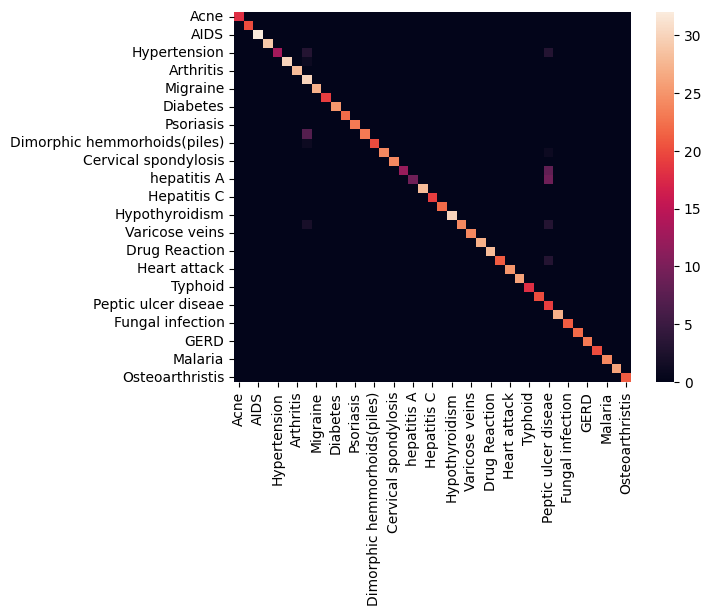

In [59]:
tree =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
tree.fit(x_train, y_train)
preds=tree.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [60]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_train =cross_val_score(tree, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 95.706%, Standard Deviation: (1.99%)


In [80]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_test =cross_val_score(tree, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_test.mean()*100.0, DS_test.std()*100.0))

Mean Accuracy: 94.198%, Standard Deviation: (3.57%)


In [61]:
rfc=RandomForestClassifier(random_state=42)

F1-score% = 99.58380389536958 | Accuracy% = 99.59349593495935


<Axes: >

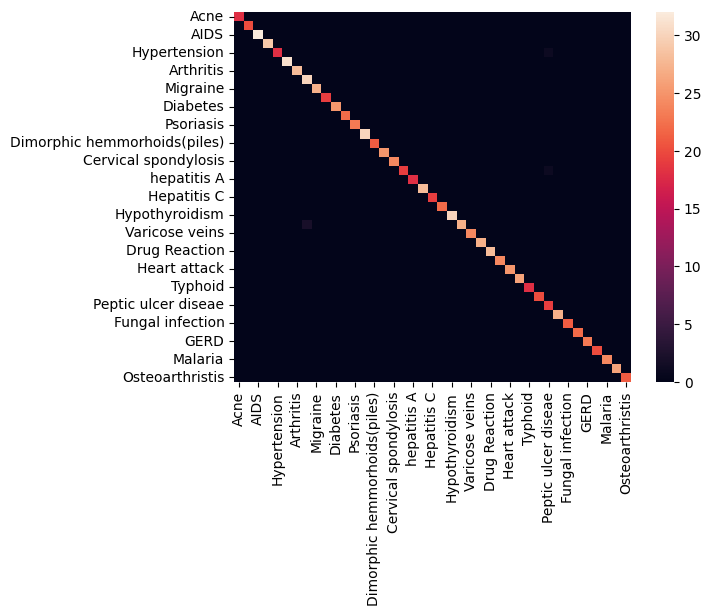

In [62]:
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [63]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 99.187%, Standard Deviation: (0.44%)


In [65]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

Mean Accuracy: 98.575%, Standard Deviation: (1.31%)


In [6]:
discrp = pd.read_csv('Symptom_Data/symptom_Description.csv')

In [67]:
discrp.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [7]:
precaution = pd.read_csv('Symptom_Data/symptom_precaution.csv')

In [69]:
precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [72]:
joblib.dump(rfc , 'Symptom_rfc.joblib')

['Symptom_rfc.joblib']

In [148]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [150]:
joblib.dump(model , 'Disease_detect.joblib')

['Disease_detect.joblib']

In [8]:
model = joblib.load('C://Users//user//Desktop//Flask_Web//models//Disease_detect.joblib')

In [9]:
def translate_to_turkish_mtranslate(text):
    translation = translate(text, "tr")
    return translation

In [10]:
def predd(x,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17):
    psymptoms = [S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17]
    #print(psymptoms)
    a = np.array(df_severity["Symptom"])
    b = np.array(df_severity["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]
    psy = [psymptoms]
    pred2 = x.predict(psy)
    disp= discrp[discrp['Disease']==pred2[0]]
    disp = disp.values[0][1]
    recomnd = precaution[precaution['Disease']==pred2[0]]
    c=np.where(precaution['Disease']==pred2[0])[0][0]
    precuation_list=[]
    for i in range(1,len(precaution.iloc[c])):
          precuation_list.append(precaution.iloc[c,i])

    trans = translate_to_turkish_mtranslate(pred2[0])
    trans2 = translate_to_turkish_mtranslate(disp)
    ilist = []

    result = {
        'Hastalık İsmi': trans,
        'Hastalık Açıklaması': trans2,
        
    }

    return result


In [76]:
n_groups = 2
algorithms = ('Decision Tree', 'Random Forest')
train_accuracy = (DS_train.mean()*100.0, rnd_forest_train.mean()*100.0,)

In [82]:
Standard_Deviation=(DS_test.std()*100.0,     
                 rnd_forest_test.std()*100.0)


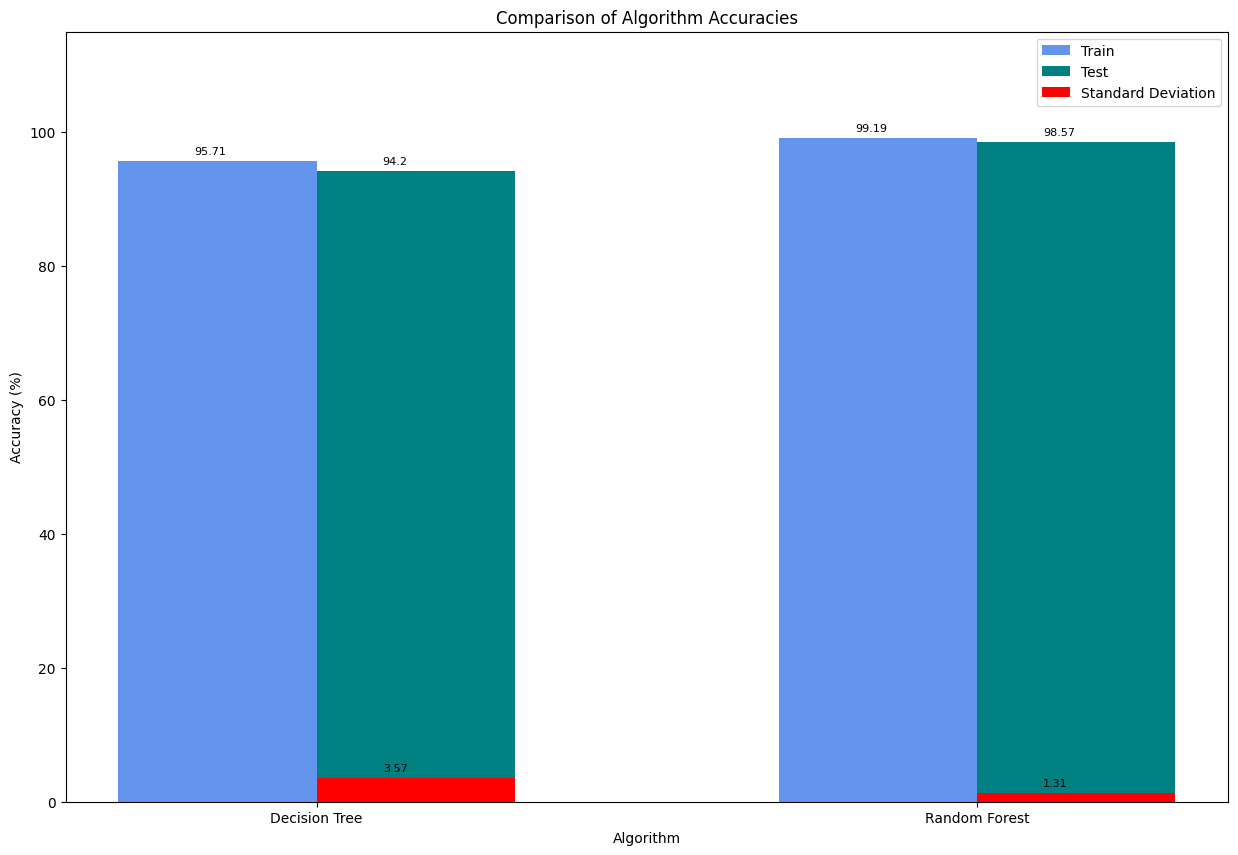

In [83]:
fig, ax = plt.subplots(figsize=(15, 10))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
rects3 = plt.bar(index + bar_width, Standard_Deviation, bar_width, alpha = opacity, color='red', label='Standard Deviation')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(Standard_Deviation):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8)) 

In [15]:
sympList=df_severity["Symptom"].to_list()
print(sympList[1])
print(sympList[2])
predd(model,sympList[1],sympList[2],sympList[3],0,0,0,0,0,0,0,0,0,0,0,0,0,0)


skin rash
nodal skin eruptions


IndexError: index 0 is out of bounds for axis 0 with size 0

In [22]:
index = sympList.index("dehydration")

print(index)

29


In [134]:
print(sympList)

['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowe

In [2]:
import pandas as pd
df_severity = pd.read_csv('Symptom_Data/Symptom-severity.csv')

In [7]:
sympList=df_severity["Symptom"].to_list()

In [12]:
print(sympList)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowe

In [6]:
import csv

def csv_to_txt(csv_filename, txt_filename):
    with open(csv_filename, 'r', newline='', encoding='utf-8') as csv_file:
        # CSV dosyasını oku
        csv_reader = csv.reader(csv_file)
        
        with open(txt_filename, 'w', encoding='utf-8') as txt_file:
            # Satırları okuyup TXT dosyasına yaz
            for row in csv_reader:
                txt_file.write('\t'.join(row) + '\n')

# Örnek kullanım
csv_to_txt('Symptom_Data/Symptom-severity.csv', 'csv.txt')